In [1]:
# !pip install pysentimiento

In [2]:
from pysentimiento import create_analyzer

analyzer = create_analyzer(task="sentiment", lang="pt")

In [3]:
output = analyzer.predict("Recebi bem antes do prazo estipulado.").output

output

'NEU'

In [4]:
# import zipfile

# with zipfile.ZipFile("data/archive.zip", mode="r") as archive:
#     for file in archive.namelist():
#         archive.extractall("data/Olist/")

In [8]:
import pandas as pd

import glob
import os

from pathlib import Path

import sqlite3


con = sqlite3.connect("data/Olist.db")

with con:
    for i in glob.glob(os.path.join("data/Olist", "*.csv")):
        name = Path(i).stem

        df = pd.read_csv(i)

        index_label = ""

        for i in df.columns:
            if "id" in i:
                index_label = i

                break

        if index_label:
            df.set_index(index_label, inplace=True)

        print(df)
        print(index_label)

        df.to_sql(name=name, con=con, if_exists="replace")

                                                customer_unique_id  \
customer_id                                                          
06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                                            ...   
17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

                                  customer_zip_code_prefix  \
customer_id                

In [9]:
import sqlite3
import pandas as pd

con = sqlite3.connect("data/Olist.db")

df = pd.read_sql(sql="SELECT * FROM olist_order_reviews_dataset", con=con)

df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,None,None,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,None,None,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,None,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,None,None,2018-07-01 00:00:00,2018-07-02 12:59:13


In [7]:
df.review_comment_title.dtype

dtype('O')

In [8]:
df.review_comment_title.isna().sum()

np.int64(87656)

In [9]:
type(df.at[0, "review_comment_title"])

NoneType

In [10]:
import numpy as np

df.fillna(np.nan)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [11]:
# !pip install -U tqdm jupyter ipywidgets

In [12]:
from tqdm.notebook import tqdm

tqdm.pandas()

In [13]:
# df["review_comment_title_sentiment"] = df["review_comment_title"].progress_map(
#     lambda x: analyzer.predict(x).output, na_action="ignore"
# )

# df["review_comment_title_sentiment"]

In [14]:
# from tqdm.contrib.concurrent import process_map


# def get_sentiment(text):
#     return analyzer.predict(text).output


# df["review_comment_message_sentiment"] = process_map(
#     get_sentiment,
#     df["review_comment_message"],
#     max_workers=12,
#     chunksize=144,
# )

# df["review_comment_message_sentiment"]

  0%|          | 0/99224 [00:00<?, ?it/s]

data\Olist\olist_products_dataset.csv


In [12]:
import sqlite3
import pandas as pd

con = sqlite3.connect("data/Olist.db")

df = pd.read_sql(sql="SELECT * FROM olist_products_dataset", con=con)

df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [16]:
df.product_weight_g.std()

np.float64(4282.038730977007)

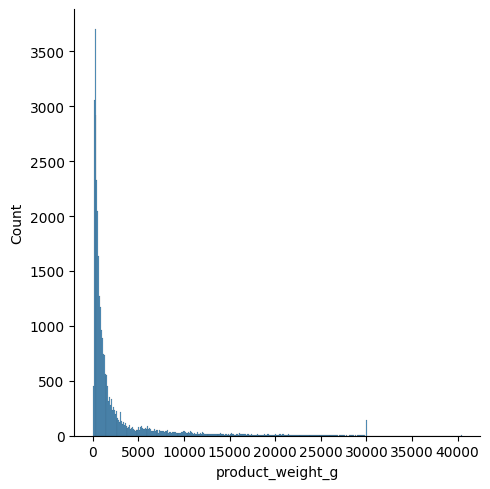

In [21]:
import seaborn as sns

sns.displot(df, x="product_weight_g")

<Axes: xlabel='product_weight_g', ylabel='Count'>

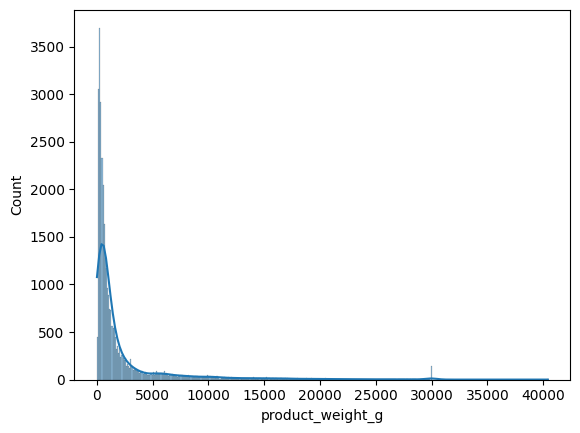

In [22]:
sns.histplot(df, x="product_weight_g", kde=True)

<Axes: >

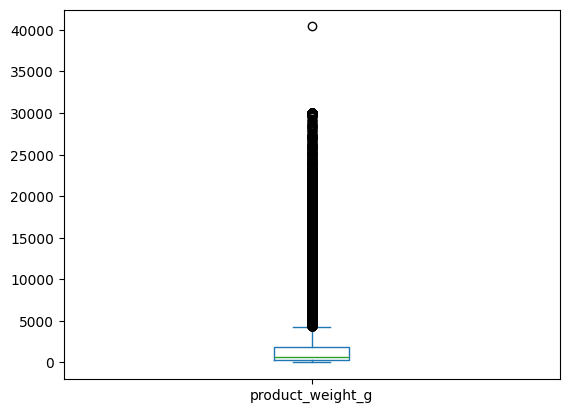

In [26]:
df["product_weight_g"].plot.box()

d:\My_Projects\blog\projects\.venv\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='product_weight_g', ylabel='Count'>

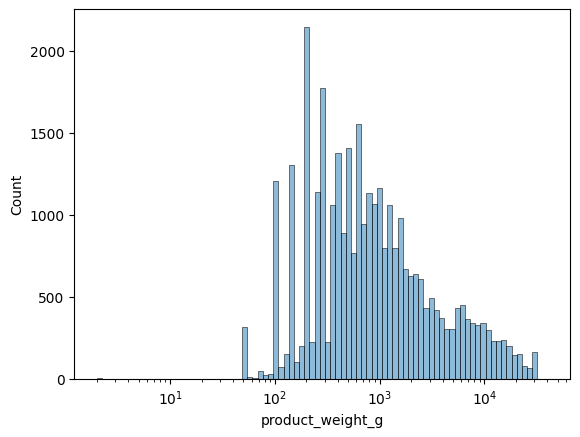

In [23]:
sns.histplot(df, x="product_weight_g", kde=True, log_scale=(True, False))

In [2]:
import sqlite3
import pandas as pd

con = sqlite3.connect("data/Olist.db")

df = pd.read_sql(
    sql="SELECT olist_products_dataset.product_description_lenght FROM olist_order_items_dataset, olist_products_dataset WHERE olist_order_items_dataset.product_id = olist_order_items_dataset.product_id",
    con=con,
)

df

MemoryError: 

In [1]:
import pandas as pd

df_olist_customers_dataset = pd.read_csv("data\Olist\olist_customers_dataset.csv")
df_olist_geolocation_dataset = pd.read_csv("data\Olist\olist_geolocation_dataset.csv")
df_olist_order_items_dataset = pd.read_csv("data\Olist\olist_order_items_dataset.csv")
df_olist_order_payments_dataset = pd.read_csv(
    "data\Olist\olist_order_payments_dataset.csv"
)
df_olist_order_reviews_dataset = pd.read_csv(
    "data\Olist\olist_order_reviews_dataset.csv"
)
df_olist_orders_dataset = pd.read_csv("data\Olist\olist_orders_dataset.csv")
df_olist_products_dataset = pd.read_csv("data\Olist\olist_products_dataset.csv")
df_olist_sellers_dataset = pd.read_csv("data\Olist\olist_sellers_dataset.csv")
df_product_category_name_translation = pd.read_csv(
    "data\Olist\product_category_name_translation.csv"
)


In [2]:
print(df_olist_orders_dataset.order_purchase_timestamp.min())
print(df_olist_orders_dataset.order_purchase_timestamp.max())

2016-09-04 21:15:19
2018-10-17 17:30:18


In [3]:
df_olist_products_dataset = df_olist_products_dataset.join(
    df_product_category_name_translation.set_index("product_category_name"),
    how="left",
    on="product_category_name",
).drop("product_category_name", axis=1)

df_olist_products_dataset

,product_id,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,45.0,67.0,2.0,12300.0,40.0,40.0,40.0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,41.0,971.0,1.0,1700.0,16.0,19.0,16.0,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,50.0,799.0,1.0,1400.0,27.0,7.0,27.0,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,60.0,156.0,2.0,700.0,31.0,13.0,20.0,computers_accessories


<Axes: ylabel='product_category_name_english'>

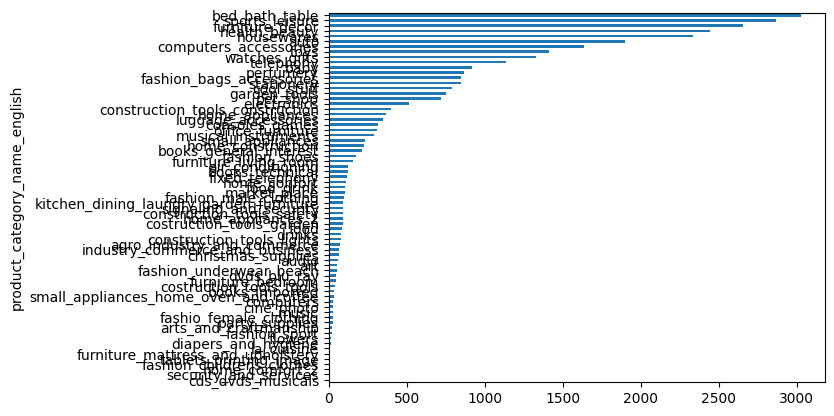

In [78]:
df_olist_products_dataset.groupby("product_category_name_english")[
    "product_category_name_english"
].count().sort_values().plot.barh()

In [90]:
df2 = (
    df.groupby(["product_id"])["product_description_lenght"]
    .value_counts()
    .sort_values(ascending=False)
    .to_frame()
    .reset_index()
)

df2

,product_id,product_description_lenght,count
0,aca2eb7d00ea1a7b8ebd4e68314663af,903.0,527
1,99a4788cb24856965c36a24e339b6058,245.0,488
2,422879e10f46682990de24d770e7f83d,348.0,484
3,389d119b48cf3043d311335e499d9c6b,341.0,392
4,368c6c730842d78016ad823897a372db,366.0,388
...,...,...,...
32336,fff1059cd247279f3726b7696c66e44e,285.0,1
32337,ffeb228c521d5464d1f71444da96c446,394.0,1
32338,ffe9468f4d890db80b7231e86931ff37,598.0,1
32339,ffdde3d63e889c9a9f9ec30d82a4c815,554.0,1


In [92]:
df2.corr(numeric_only=True)

,product_description_lenght,count
product_description_lenght,1.00000,0.00831
count,0.00831,1.00000


In [6]:
df = df_olist_order_items_dataset.set_index("order_id").join(
    df_olist_products_dataset.set_index("product_id"), how="left", on="product_id"
)

df

,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
order_id,,,,,,,,,,,,,,
00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,31.0,232.0,1.0,8950.0,45.0,26.0,38.0,computers_accessories
fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,43.0,869.0,1.0,967.0,21.0,24.0,19.0,sports_leisure


In [12]:
df.loc[df.product_weight_g == df.product_weight_g.max()][
    ["product_category_name_english", "price"]
]

,product_category_name_english,price
order_id,,
4a45f9f66971302cf881ecfa142f42ba,bed_bath_table,80.0
6ecf1a4051b4c5ed613624b460970a26,bed_bath_table,80.0
9223919b300f6989e1715333fca0d6ce,bed_bath_table,80.0


What affects the freight value?

- Same city?
